In [1]:
# Exercise 1: Linear Regression

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
# Part 1: Basic Function

def warmUpExercise():
    A = np.eye(5)
    return A

In [3]:
print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')
warmUpExercise()

Running warmUpExercise ... 
5x5 Identity Matrix: 


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
# Part 2: Plotting

def plotData(x, y):
    plt.plot(x, y, 'rx', markersize=4, markeredgewidth=0.8)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

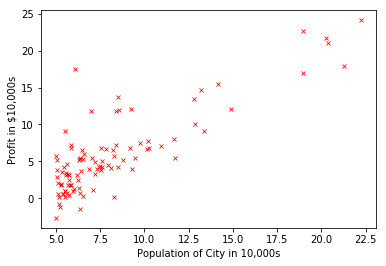

In [5]:
data = np.loadtxt('../ex1/ex1data1.txt', delimiter=',')
x = data[:, :1]
y = data[:, 1]
m = len(y)

plotData(x, y)

In [6]:
# Part 3: Cost and Gradinet descent

def computeCost(X, y, theta):
    m = len(y)
    
    hypothesis = np.dot(X, theta)
    error = hypothesis - y
    
    J = np.dot(error.T, error) / (2 * m)
    
    return J


def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        hypothesis = np.dot(X, theta)
        error = hypothesis - y
        
        theta_grad = np.dot(X.T, error) / m
        
        theta -= alpha * theta_grad
        J_history[i] = computeCost(X, y, theta)
    
    return theta, J_history


Testing the cost function ...
With Theta = [0  0]
Cost Computed = 32.07
Expected cost value (approx) 32.07

With theta = [-1  2]
Cost computed = 54.24
Expected cost value (approx) 54.24

Running Gradient Descent ...
Theta found by gradient descent: [-3.63029144  1.16636235]
Expected theta values (approx) [-3.6303  1.1664]



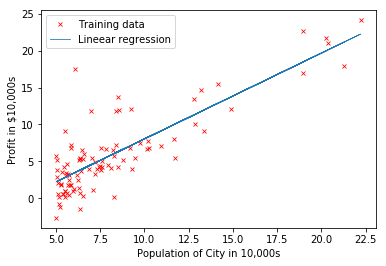

In [7]:
X = np.c_[np.ones(m), x] # Add a column of ones to x
theta = np.zeros(2) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

print('\nTesting the cost function ...')
# compute and display initial cost
J = computeCost(X, y, theta)
print('With Theta = [0  0]\n'
      'Cost Computed = {:.2f}'.format(J))
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.array([-1, 2]));
print('\nWith theta = [-1  2]\n'
      'Cost computed = {:.2f}'.format(J))
print('Expected cost value (approx) 54.24');

print('\nRunning Gradient Descent ...')
# run gradient descent
theta, _ = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: {}'.format(theta))
print('Expected theta values (approx) [-3.6303  1.1664]\n')

# Plot the linear fit
plotData(x, y)
plt.plot(X[:, 1], np.dot(X, theta), '-', linewidth=0.8)
plt.legend(['Training data', 'Lineear regression'])
None

In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:.2f}'
      .format(predict1 * 10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:.2f}'
      .format(predict2 * 10000))

For population = 35,000, we predict a profit of 4519.77
For population = 70,000, we predict a profit of 45342.45


Visualizing J(theta_0, theta_1) ...


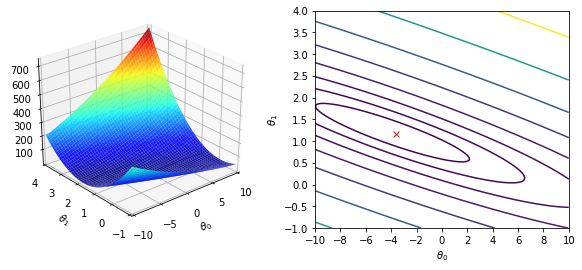

In [26]:
# Part 4: Visualizing J(theta_0, theta_1)

print('Visualizing J(theta_0, theta_1) ...')

# Grid over which we will cacluate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[i, j] = computeCost(X, y, t)

# Because of the way meshgrids work in the surface command, we need to
# transpose J_vals before calling surface, or else the axes will be flipped
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
        
# Suface plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.jet, alpha=0.9)
ax.view_init(30, 50)
ax.axis([10, -10, 4, -1])
ax.xaxis.set_major_locator(LinearLocator(5))
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')


# Contour plot
ax = fig.add_subplot(1, 2, 2)

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
ax.xaxis.set_major_locator(LinearLocator(11))
ax.yaxis.set_major_locator(LinearLocator(11))
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$') 
ax.plot(theta[0], theta[1], 'rx')
None